# Project A4: EESTI-X-TEE-HICCUPS


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pytz

## COVID-19 data preparation

In [2]:
#Read in data
data= pd.read_csv('teste-pevas.csv')
data

,DateTime,Positiivne,Negatiivne,Positiivsete testide %
0,2020-02-26 00:00:00,1,12,7.69
1,2020-02-27 00:00:00,0,10,0.00
2,2020-02-28 00:00:00,0,13,0.00
3,2020-02-29 00:00:00,0,8,0.00
4,2020-03-01 00:00:00,0,18,0.00
...,...,...,...,...
279,2020-12-01 00:00:00,524,5889,8.17
280,2020-12-02 00:00:00,451,4936,8.37
281,2020-12-03 00:00:00,470,4194,10.08
282,2020-12-04 00:00:00,560,5844,8.74


In [3]:
# add tests sum per day column
data['Testide_arv'] = data['Positiivne']+ data['Negatiivne']
print(data.tail())
# Index of max tests per day
print(data.Testide_arv.idxmax())
# data of max tests per day row
print(data.iloc[data.Testide_arv.idxmax()]) 

                DateTime  Positiivne  Negatiivne  Positiivsete testide %  \
279  2020-12-01 00:00:00         524        5889                    8.17   
280  2020-12-02 00:00:00         451        4936                    8.37   
281  2020-12-03 00:00:00         470        4194                   10.08   
282  2020-12-04 00:00:00         560        5844                    8.74   
283  2020-12-05 00:00:00         479        5240                    8.38   

     Testide_arv  
279         6413  
280         5387  
281         4664  
282         6404  
283         5719  
266
DateTime                  2020-11-18 00:00:00
Positiivne                                409
Negatiivne                               6712
Positiivsete testide %                   5.74
Testide_arv                              7121
Name: 266, dtype: object


In [4]:
# mark local time to use it later for DateTime conversions
lokaalne = pytz.timezone('Europe/Tallinn')

In [5]:
data['DateTime'] = pd.to_datetime(data['DateTime'], infer_datetime_format=True) #sisend on kohalikus ajas
#ajast teeme indeksi,  lisame ajatsooni info,igaks juhuks sorteerime
data=data.set_index(pd.DatetimeIndex(data['DateTime'])).tz_localize(lokaalne).sort_index() 

In [6]:
data

,DateTime,Positiivne,Negatiivne,Positiivsete testide %,Testide_arv
DateTime,,,,,
2020-02-26 00:00:00+02:00,2020-02-26,1,12,7.69,13
2020-02-27 00:00:00+02:00,2020-02-27,0,10,0.00,10
2020-02-28 00:00:00+02:00,2020-02-28,0,13,0.00,13
2020-02-29 00:00:00+02:00,2020-02-29,0,8,0.00,8
2020-03-01 00:00:00+02:00,2020-03-01,0,18,0.00,18
...,...,...,...,...,...
2020-12-01 00:00:00+02:00,2020-12-01,524,5889,8.17,6413
2020-12-02 00:00:00+02:00,2020-12-02,451,4936,8.37,5387
2020-12-03 00:00:00+02:00,2020-12-03,470,4194,10.08,4664


In [7]:
# Results to file, if needed later
data.to_csv('teste_pevas1.csv')

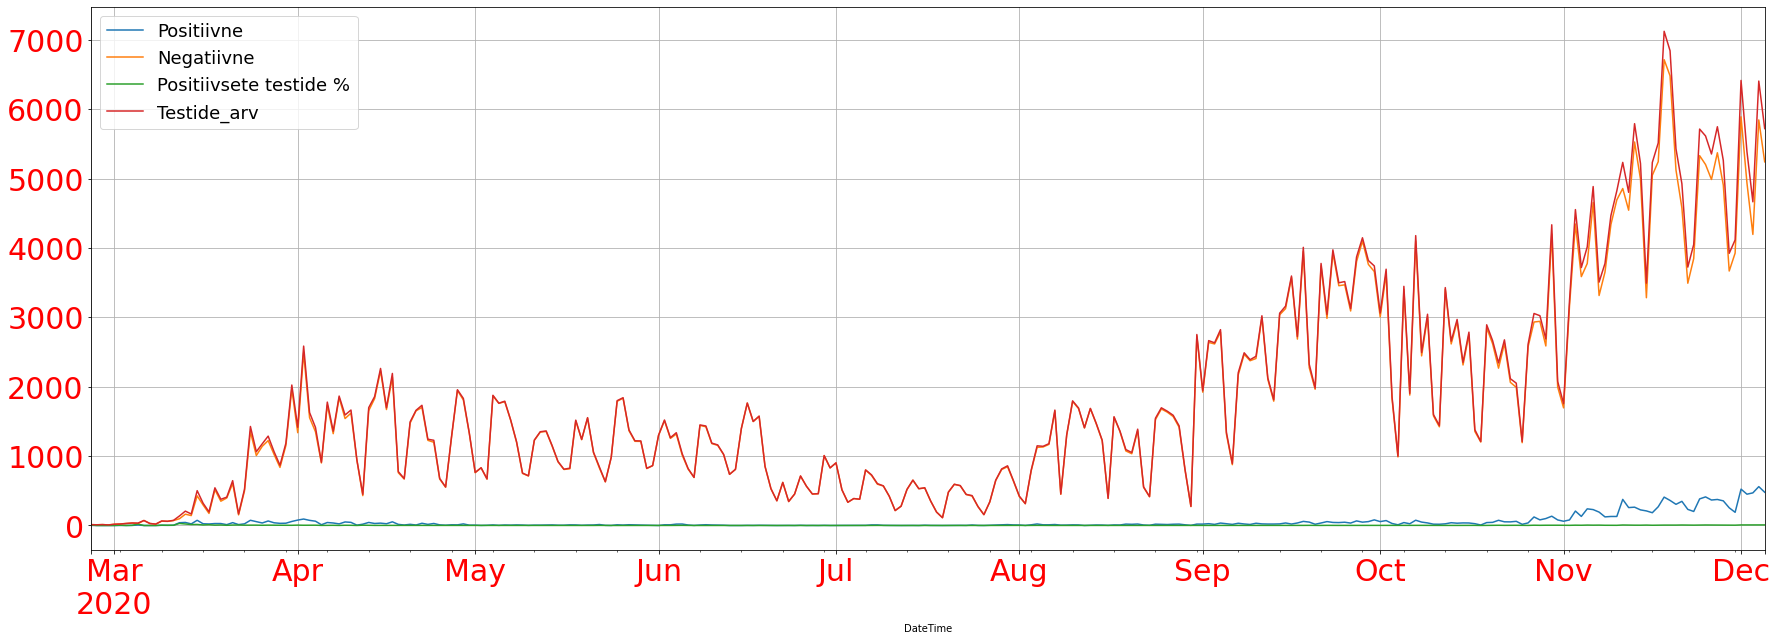

In [8]:
# Plot of absolut scale
data.plot(x='DateTime', figsize=(30,10),grid=True)
plt.legend(prop={'size': 18})
plt.xticks(size = 30, color='red')
plt.yticks(size = 30, color = 'red')
plt.show()

## Patient portal data preparation

In [9]:
# What the pats data contain
df = pd.read_csv('pats-mai-praegu.csv')
df.head()

,clientMemberCode,clientSubsystemCode,producerDurationProducerView,requestAttachmentCount,requestInTs,requestMimeSize,requestSoapSize,responseAttachmentCount,responseMimeSize,responseSoapSize,securityServerType,serviceCode,serviceMemberCode,serviceSubsystemCode,serviceVersion,succeeded,totalDuration
0,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4868.0,0.0,NaN,8930.0,Client,hl7,70009770,digilugu,v1,True,1813.0
1,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4388.0,0.0,NaN,26978.0,Client,hl7,70009770,digilugu,v1,True,253.0
2,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4660.0,0.0,NaN,12738.0,Client,hl7,70009770,digilugu,v1,True,1133.0
3,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4656.0,0.0,NaN,8804.0,Client,hl7,70009770,digilugu,v1,True,207.0
4,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,6723.0,0.0,NaN,10340.0,Client,hl7,70009770,digilugu,v1,True,3864.0


In [10]:
# Minimize the data fields
fields=['requestInTs','producerDurationProducerView','totalDuration','succeeded','securityServerType']
data_pats=pd.read_csv('pats-mai-praegu.csv',usecols=fields)
data_pats_copy = data_pats

In [11]:
data_pats = data_pats.drop(data_pats[data_pats["securityServerType"] == 'Producer'].index)
data_pats = data_pats.drop(data_pats[data_pats["succeeded"] == False].index)

### Time zones exploration

This section is criticat to all next, because it give the meaning to time containing columns in human readable form.
Time is critical value if managing with logs and looking for maintenance and availability.

In [12]:
# Input file does not contain datazone info, but from doc we know, it is in UTC
data_pats['requestInTs'] = pd.to_datetime(data_pats['requestInTs'], unit='ms',utc=True)  

# DataTime to index, time into local (Estonian timezone), sort data by DateTime (input isn't sorted)
data_pats=data_pats.set_index(pd.DatetimeIndex(data_pats['requestInTs'])).tz_convert(lokaalne).sort_index() 
data_pats.index.name = 'DateTime'
data_pats

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration
DateTime,,,,,
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,2511.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,759.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,3332.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,307.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,2527.0
...,...,...,...,...,...
2020-11-25 23:00:00+02:00,NaN,2020-11-25 21:00:00+00:00,Client,True,574.0
2020-11-25 23:00:00+02:00,NaN,2020-11-25 21:00:00+00:00,Client,True,633.0
2020-11-25 23:00:00+02:00,NaN,2020-11-25 21:00:00+00:00,Client,True,883.0


In [13]:

#Grouping by day
data_pats1 = data_pats.resample('d').count()

data_pats1.head()

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration
DateTime,,,,,
2020-05-08 00:00:00+03:00,0,27654,27654,27654,27654
2020-05-09 00:00:00+03:00,0,12785,12785,12785,12785
2020-05-10 00:00:00+03:00,0,13061,13061,13061,13061
2020-05-11 00:00:00+03:00,0,40418,40418,40418,40418
2020-05-12 00:00:00+03:00,0,40409,40409,40409,40409


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 <a list of 10 Text major ticklabel objects>)

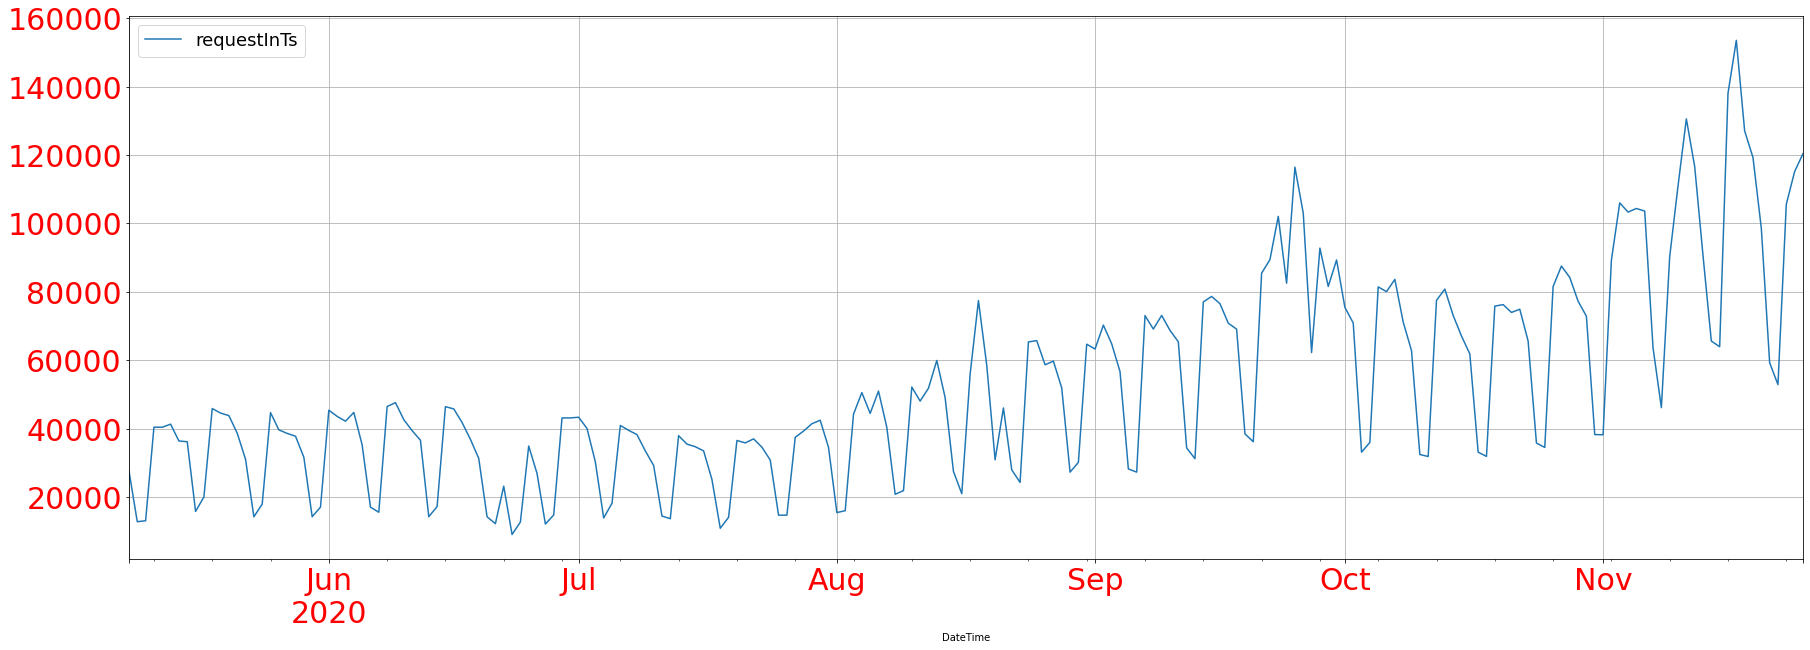

In [14]:
# Data visualization
data_pats1.plot(y='requestInTs', figsize=(30,10),grid=True)
plt.legend(prop={'size': 18})
plt.xticks(size = 30, color='red')
plt.yticks(size = 30, color = 'red')


In [15]:
# Add columns Weekday (0 = Monday, 6= Sunday) and Hour (0  is 0 till 1,  23 is 23:00 till 23:59)
data_pats2 = data_pats
data_pats2 = data_pats2.resample('h').count()
data_pats2['Weekday'] = data_pats2.index.to_series().dt.day_name()
data_pats2['Hour'] = data_pats2.index.to_series().dt.hour
data_pats2['Month'] = data_pats2.index.to_series().dt.month
data_pats2

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration,Weekday,Hour,Month
DateTime,,,,,,,,
2020-05-08 00:00:00+03:00,0,293,293,293,293,Friday,0,5
2020-05-08 01:00:00+03:00,0,131,131,131,131,Friday,1,5
2020-05-08 02:00:00+03:00,0,73,73,73,73,Friday,2,5
2020-05-08 03:00:00+03:00,0,12,12,12,12,Friday,3,5
2020-05-08 04:00:00+03:00,0,40,40,40,40,Friday,4,5
...,...,...,...,...,...,...,...,...
2020-11-25 19:00:00+02:00,0,4459,4459,4459,4459,Wednesday,19,11
2020-11-25 20:00:00+02:00,0,3961,3961,3961,3961,Wednesday,20,11
2020-11-25 21:00:00+02:00,0,5516,5516,5516,5516,Wednesday,21,11


In [16]:
from pandas.api.types import CategoricalDtype
def convertWeekDays(df):
    df = df.reset_index(drop=True)
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    df['Weekday'] = df['Weekday'].astype(cat_type)

    df = df.groupby(["Weekday", "Hour"]).mean()
    df = df.reset_index()
    df_pivot = df.pivot(index="Weekday", columns="Hour", values="requestInTs")
    return df_pivot
data_pats2

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration,Weekday,Hour,Month
DateTime,,,,,,,,
2020-05-08 00:00:00+03:00,0,293,293,293,293,Friday,0,5
2020-05-08 01:00:00+03:00,0,131,131,131,131,Friday,1,5
2020-05-08 02:00:00+03:00,0,73,73,73,73,Friday,2,5
2020-05-08 03:00:00+03:00,0,12,12,12,12,Friday,3,5
2020-05-08 04:00:00+03:00,0,40,40,40,40,Friday,4,5
...,...,...,...,...,...,...,...,...
2020-11-25 19:00:00+02:00,0,4459,4459,4459,4459,Wednesday,19,11
2020-11-25 20:00:00+02:00,0,3961,3961,3961,3961,Wednesday,20,11
2020-11-25 21:00:00+02:00,0,5516,5516,5516,5516,Wednesday,21,11


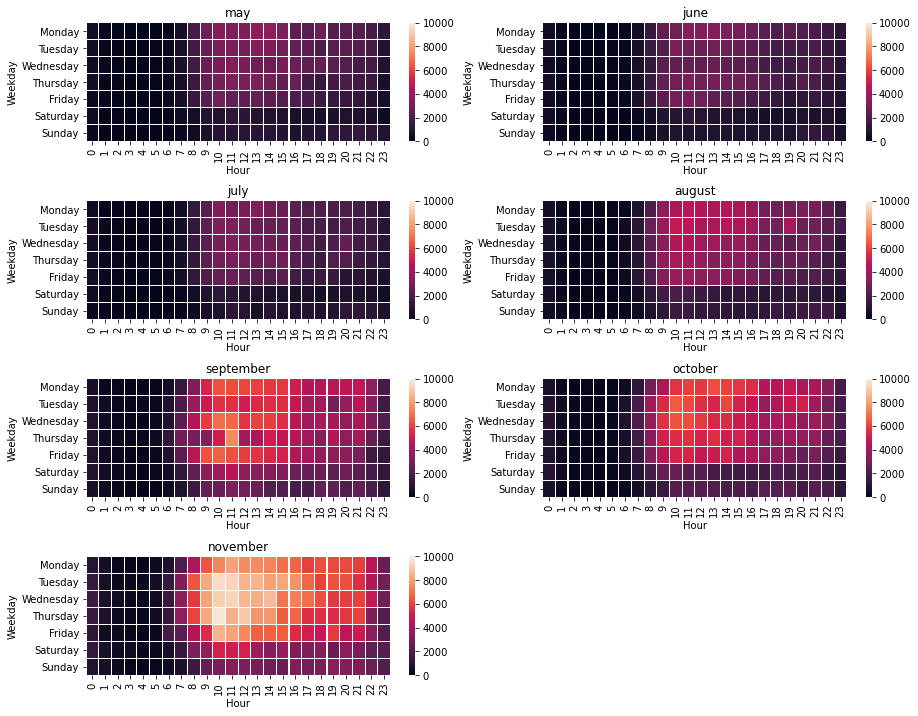

In [18]:
import seaborn as sns
may = data_pats2[data_pats2['Month']==5]
june = data_pats2[data_pats2['Month']==6]
july = data_pats2[data_pats2['Month']==7]
august = data_pats2[data_pats2['Month']==8]
september = data_pats2[data_pats2['Month']==9]
october = data_pats2[data_pats2['Month']==10]
november = data_pats2[data_pats2['Month']==11]
jarjend = [may, june, july, august, september, october, november]
nimed = ["may", "june", "july", "august", "september", "october", "november"]
uus = [convertWeekDays(i) for i in jarjend]
cmay = uus[0]
cjune = uus[1]
cjuly = uus[2]
caugust = uus[3]
cseptember = uus[4]
coctober = uus[5]
cnovember = uus[6]
abi = [cmay, cjune, cjuly, caugust, cseptember, coctober, cnovember]
fig = plt.figure(figsize=[15,12])
for i in range(len(abi)):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 0.5)
    fig = sns.heatmap(abi[i],
            linewidths=0.1, vmin=0, vmax=10000)
    fig.set_title(nimed[i])
#[print(i.tail()) for i in jarjend]'''

In [19]:
from pandas.api.types import CategoricalDtype

data_pats2 = data_pats2.reset_index(drop=True)
print(data_pats2.head())
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_pats2['Weekday'] = data_pats2['Weekday'].astype(cat_type)
data_pats2 = data_pats2.groupby(["Weekday", "Hour"]).mean()

   producerDurationProducerView  requestInTs  securityServerType  succeeded  \
0                             0          293                 293        293   
1                             0          131                 131        131   
2                             0           73                  73         73   
3                             0           12                  12         12   
4                             0           40                  40         40   

   totalDuration Weekday  Hour  Month  
0            293  Friday     0      5  
1            131  Friday     1      5  
2             73  Friday     2      5  
3             12  Friday     3      5  
4             40  Friday     4      5  


In [20]:
# To find possible maintenance hours and visualize the result on heatmap
print(data_pats2.head())
data_pats2 = data_pats2.reset_index()
data_pats_pivot = data_pats2.pivot(index="Weekday", columns="Hour", values="requestInTs")
print(data_pats_pivot.head())

              producerDurationProducerView  requestInTs  securityServerType  \
Weekday Hour                                                                  
Monday  0                              0.0   607.379310          607.379310   
        1                              0.0   262.379310          262.379310   
        2                              0.0   116.862069          116.862069   
        3                              0.0    68.862069           68.862069   
        4                              0.0    68.689655           68.689655   

               succeeded  totalDuration     Month  
Weekday Hour                                       
Monday  0     607.379310     607.379310  8.034483  
        1     262.379310     262.379310  8.034483  
        2     116.862069     116.862069  8.034483  
        3      68.862069      68.862069  8.034483  
        4      68.689655      68.689655  8.034483  
Hour               0           1           2           3           4   \
Weekday  

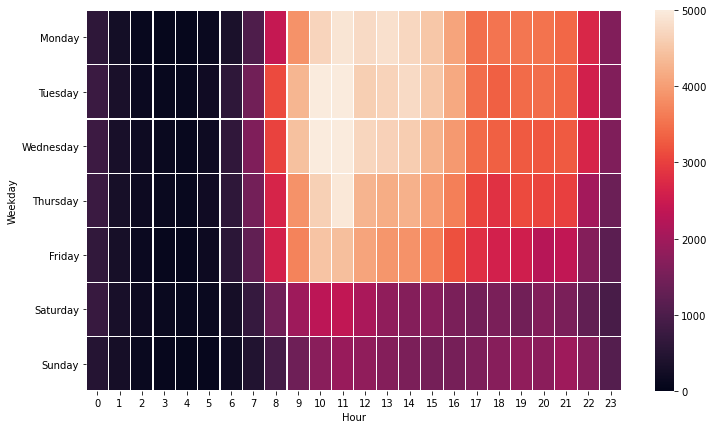

In [21]:
fig2 = plt.figure(figsize=[12,7])
sns.heatmap(data_pats_pivot, linewidths=0.1, vmin=5000, vmax=0
           )

Text(0.5, 1.0, 'Mean of request by Weekday')

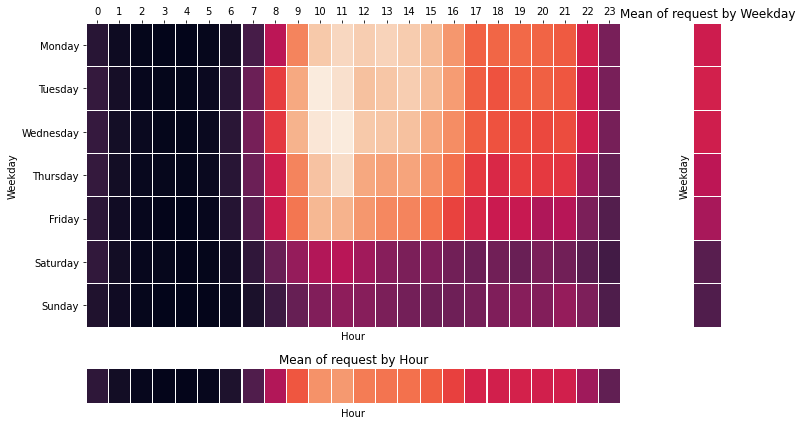

In [22]:
#Experiments with jointplots
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=16, rowspan=16)
ax2 = plt.subplot2grid((20,20), (18,0), colspan=16, rowspan=2)
ax3 = plt.subplot2grid((20,20), (0,18), colspan=1, rowspan=16)

#mask = np.zeros_like(pv)
#mask[np.tril_indices_from(mask)] = True

vmin = min(data_pats_pivot.values.min(), data_pats_pivot.values.min())
vmax = max(data_pats_pivot.values.max(), data_pats_pivot.values.max())

sns.heatmap(data_pats_pivot, ax=ax1, 
            #annot=True, 
            linewidths=0.1, vmin=vmin, vmax=vmax,
            #mask=mask, 
            linecolor='w', cbar = False)
ax1.xaxis.tick_top()
ax1.set_xticklabels(data_pats_pivot.columns
                    #,rotation=40
                   )



sns.heatmap((pd.DataFrame(data_pats_pivot.mean(axis=0))).transpose(), ax=ax2,  
            #annot=True,  
            linewidths=0.1, vmin=vmin, vmax=vmax,
            cbar=False, xticklabels=False, yticklabels=False)
ax2.set_title('Mean of request by Hour')

sns.heatmap(pd.DataFrame(data_pats_pivot.mean(axis=1)), ax=ax3,  
            #annot=True, 
            linewidths=0.1, vmin=vmin, vmax=vmax,
            cbar=False, xticklabels=False, yticklabels=False)
ax3.set_title('Mean of request by Weekday')

In [23]:
# Heatmap matrix data
data_pats_pivot
# TODO: iga kuu kohta eraldi - juuni-juuli eraldi

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,607.379310,262.379310,116.862069,68.862069,68.689655,124.379310,355.655172,1018.172414,2438.793103,3872.172414,...,4739.413793,4529.241379,4094.000000,3482.413793,3535.448276,3564.793103,3516.517241,3417.586207,2714.172414,1633.965517
Tuesday,779.965517,347.965517,152.758621,109.655172,114.310345,207.551724,612.241379,1464.620690,3111.896552,4298.068966,...,4774.137931,4530.137931,4141.517241,3457.689655,3336.965517,3453.137931,3467.896552,3360.103448,2594.137931,1639.689655
Wednesday,797.034483,331.137931,185.793103,117.862069,111.172414,193.068966,632.000000,1608.724138,3044.620690,4437.275862,...,4599.965517,4273.034483,3964.689655,3444.379310,3331.448276,3264.344828,3238.448276,3263.103448,2671.758621,1602.655172
Thursday,768.785714,312.428571,173.821429,123.857143,108.250000,198.607143,615.500000,1480.321429,2674.500000,3875.535714,...,4255.750000,4003.214286,3653.785714,3059.857143,2844.857143,3119.035714,3065.428571,3005.964286,2029.035714,1385.214286
Friday,659.724138,298.000000,155.068966,89.724138,82.310345,159.689655,574.724138,1251.275862,2629.379310,3709.517241,...,3867.896552,3653.793103,3166.482759,2825.172414,2610.275862,2574.965517,2262.862069,2366.103448,1666.724138,1174.068966
Saturday,736.965517,321.758621,161.103448,127.655172,101.034483,123.206897,291.241379,711.724138,1443.448276,1971.068966,...,1664.586207,1715.965517,1545.034483,1474.241379,1543.103448,1453.655172,1655.862069,1545.482759,1255.931034,942.689655
Sunday,499.068966,281.758621,131.068966,82.900000,63.310345,87.172414,194.379310,437.000000,900.241379,1420.068966,...,1574.275862,1495.931034,1510.034483,1586.551724,1701.482759,1805.172414,1748.172414,1962.275862,1683.793103,1107.137931


## COVID-19 and Patient Portal logs together

In [24]:

data

,DateTime,Positiivne,Negatiivne,Positiivsete testide %,Testide_arv
DateTime,,,,,
2020-02-26 00:00:00+02:00,2020-02-26,1,12,7.69,13
2020-02-27 00:00:00+02:00,2020-02-27,0,10,0.00,10
2020-02-28 00:00:00+02:00,2020-02-28,0,13,0.00,13
2020-02-29 00:00:00+02:00,2020-02-29,0,8,0.00,8
2020-03-01 00:00:00+02:00,2020-03-01,0,18,0.00,18
...,...,...,...,...,...
2020-12-01 00:00:00+02:00,2020-12-01,524,5889,8.17,6413
2020-12-02 00:00:00+02:00,2020-12-02,451,4936,8.37,5387
2020-12-03 00:00:00+02:00,2020-12-03,470,4194,10.08,4664


In [25]:
data_pats1

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration
DateTime,,,,,
2020-05-08 00:00:00+03:00,0,27654,27654,27654,27654
2020-05-09 00:00:00+03:00,0,12785,12785,12785,12785
2020-05-10 00:00:00+03:00,0,13061,13061,13061,13061
2020-05-11 00:00:00+03:00,0,40418,40418,40418,40418
2020-05-12 00:00:00+03:00,0,40409,40409,40409,40409
...,...,...,...,...,...
2020-11-21 00:00:00+02:00,0,59274,59274,59274,59274
2020-11-22 00:00:00+02:00,0,52863,52863,52863,52863
2020-11-23 00:00:00+02:00,0,105587,105587,105587,105587


In [26]:
#Slice data by log data limits 
data_pats_lim = data_pats1[['requestInTs']]
start_date = data_pats_lim.index.min()
end_date = data_pats_lim.index.max()
mask = (data.index >= start_date) & (data.index <= end_date)
data_yhis = data.loc[mask]

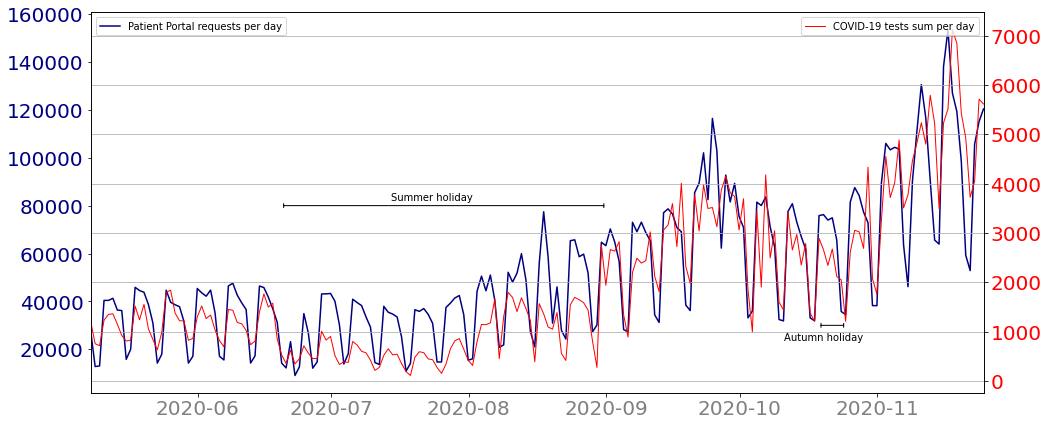

In [27]:
# Plot COVID-19 tests sum and logs together
fig1 = plt.figure(figsize=[16,7])

ax1 = fig1.add_subplot(111)
plt.xticks(size = 20, color='gray')
plt.yticks(size = 20, color='navy')
ax1.plot(data_pats1["requestInTs"], color='navy', linewidth=1.5 )
ax1.legend([ax1.get_lines()[0]], ["Patient Portal requests per day"])

# Add school holidays on the plot

ax1.annotate("Summer holiday", xy=(pd.to_datetime('2020-06-20 00:00:00+03:00'),80000),xycoords='data', ha ='center',
            xytext=(150, 5), textcoords='offset points')
ax1.annotate('',xy=(pd.to_datetime('2020-06-20 00:00:00+03:00'),80000), xytext=(pd.to_datetime('2020-09-01 00:00:00+03:00'),80000),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2', })
ax1.annotate("Autumn holiday", xy=(pd.to_datetime('2020-10-19 00:00:00+03:00'),30000),xycoords='data', ha ='center',
            xytext=(5, -15), textcoords='offset points')
ax1.annotate('',xy=(pd.to_datetime('2020-10-19 00:00:00+03:00'),30000), xytext=(pd.to_datetime('2020-10-25 00:00:00+03:00'),30000),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2', })

'''ax1.annotate("Summer holiday", xy=('2020-06-20 00:00:00+03:00',80000),xycoords='data', ha ='center',
            xytext=(150, 5), textcoords='offset points')
ax1.annotate('',xy=('2020-06-20 00:00:00+03:00',80000), xytext=('2020-09-01 00:00:00+03:00',80000),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2', })
ax1.annotate("Autumn holiday", xy=('2020-10-19 00:00:00+03:00',30000),xycoords='data', ha ='center',
            xytext=(5, -15), textcoords='offset points')
ax1.annotate('',xy=('2020-10-19 00:00:00+03:00',30000), xytext=('2020-10-25 00:00:00+03:00',30000),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2', })'''



ax2 = ax1.twinx()
ax2.plot(data_yhis["Testide_arv"], color="red", linewidth=1.0 )
ax2.legend([ax2.get_lines()[0]], ["COVID-19 tests sum per day"], loc = 'upper right')
#ax2.set_ylabel("Testide_arv")
plt.yticks(size = 20, color = 'red')
plt.grid()
plt.xlim((start_date, end_date)) # X axis limits

plt.show()

In [28]:
#Slice data by log data limits

data_pats_korr = data_pats1[['requestInTs']]
start_date = data_pats_korr.index.min()
end_date = data_pats_korr.index.max()
mask = (data.index >= start_date) & (data.index <= end_date)
data_koroona_korr = data[['Testide_arv']].loc[mask]

# control that data shape and format is similar
print(data_pats_korr)
print(data_koroona_korr) 

                           requestInTs
DateTime                              
2020-05-08 00:00:00+03:00        27654
2020-05-09 00:00:00+03:00        12785
2020-05-10 00:00:00+03:00        13061
2020-05-11 00:00:00+03:00        40418
2020-05-12 00:00:00+03:00        40409
...                                ...
2020-11-21 00:00:00+02:00        59274
2020-11-22 00:00:00+02:00        52863
2020-11-23 00:00:00+02:00       105587
2020-11-24 00:00:00+02:00       115137
2020-11-25 00:00:00+02:00       120365

[202 rows x 1 columns]
                           Testide_arv
DateTime                              
2020-05-08 00:00:00+03:00         1205
2020-05-09 00:00:00+03:00          756
2020-05-10 00:00:00+03:00          716
2020-05-11 00:00:00+03:00         1231
2020-05-12 00:00:00+03:00         1351
...                                ...
2020-11-21 00:00:00+02:00         4925
2020-11-22 00:00:00+02:00         3723
2020-11-23 00:00:00+02:00         4049
2020-11-24 00:00:00+02:00         5712
2

In [29]:
# Merge data frames by index
korrelatsiooni_data = data_pats_korr.merge(data_koroona_korr, left_index=True, right_index=True)
korrelatsiooni_data 

,requestInTs,Testide_arv
DateTime,,
2020-05-08 00:00:00+03:00,27654,1205
2020-05-09 00:00:00+03:00,12785,756
2020-05-10 00:00:00+03:00,13061,716
2020-05-11 00:00:00+03:00,40418,1231
2020-05-12 00:00:00+03:00,40409,1351
...,...,...
2020-11-21 00:00:00+02:00,59274,4925
2020-11-22 00:00:00+02:00,52863,3723
2020-11-23 00:00:00+02:00,105587,4049


In [30]:
# correlation matrix of COVID-19 tests and Patsient portal requests

print("Correlation coefficient = ", korrelatsiooni_data.corr().iloc[-1,0])
korrelatsiooni_data.corr()

Correlation coefficient =  0.8890845641128995


,requestInTs,Testide_arv
requestInTs,1.000000,0.889085
Testide_arv,0.889085,1.000000


## Exam data preparation

In [31]:
data_eksam = pd.read_csv('eksam.csv')
data_eksam.head()

,clientMemberCode,clientSubsystemCode,producerDurationProducerView,requestAttachmentCount,requestInTs,requestMimeSize,requestSoapSize,responseAttachmentCount,responseMimeSize,responseSoapSize,securityServerType,serviceCode,serviceMemberCode,serviceSubsystemCode,serviceVersion,succeeded,totalDuration
0,70008747,70008747-misp,NaN,0.0,1588924800000,NaN,2263.0,NaN,NaN,NaN,Client,e_tunnistus_am,90008287,eis-adapter,v1,False,44.0
1,90005872,sais2,73.0,0.0,1588968000000,NaN,1325.0,0.0,NaN,1591.0,Producer,saisEksamid,90008287,eis-adapter,v2,True,NaN
2,90005872,sais2,NaN,0.0,1588968000000,NaN,1325.0,0.0,NaN,1591.0,Client,saisEksamid,90008287,eis-adapter,v2,True,179.0
3,90005872,sais2,167.0,0.0,1588968000000,NaN,1325.0,0.0,NaN,1591.0,Producer,saisEksamid,90008287,eis-adapter,v2,True,NaN
4,90005872,sais2,NaN,0.0,1588968000000,NaN,1325.0,0.0,NaN,1591.0,Client,saisEksamid,90008287,eis-adapter,v2,True,286.0


### Exam results date
The results of the National Examination are known no later than 30 June 2020 and electronic state 
Examination Certificates will be issued to students no later than 1 July 2020. 
Since then the electronic state Examination Certificate can also be downloaded from the State Portal. 

Exam_results_data = '2020-06-30 00:00:00+03:00'

In [32]:
# Minimize the data fields
fields=['requestInTs','producerDurationProducerView','totalDuration','succeeded','securityServerType']
data_eksam = pd.read_csv('eksam.csv',usecols=fields)

In [33]:
data_eksam = data_eksam.drop(data_eksam[data_eksam["securityServerType"] == 'Producer'].index)
data_eksam = data_eksam.drop(data_eksam[data_eksam["succeeded"] == False].index)

In [34]:
# Input file does not contain datazone info, but from doc we know, it is in UTC
data_eksam['requestInTs'] = pd.to_datetime(data_eksam['requestInTs'], unit='ms',utc=True)  

# DataTime to index, time into local (Estonian timezone), sort data by DateTime (input isn't sorted)
data_eksam = data_eksam.set_index(pd.DatetimeIndex(data_eksam['requestInTs'])).tz_convert(lokaalne).sort_index() 
data_eksam.index.name = 'DateTime'
data_eksam

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration
DateTime,,,,,
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,251.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,1193.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,390.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,233.0
2020-05-08 00:00:00+03:00,NaN,2020-05-07 21:00:00+00:00,Client,True,848.0
...,...,...,...,...,...
2020-10-29 23:00:00+02:00,NaN,2020-10-29 21:00:00+00:00,Client,True,123.0
2020-10-29 23:00:00+02:00,NaN,2020-10-29 21:00:00+00:00,Client,True,136.0
2020-10-29 23:00:00+02:00,NaN,2020-10-29 21:00:00+00:00,Client,True,201.0


In [35]:
data_eksam1 = data_eksam.resample('d').count()

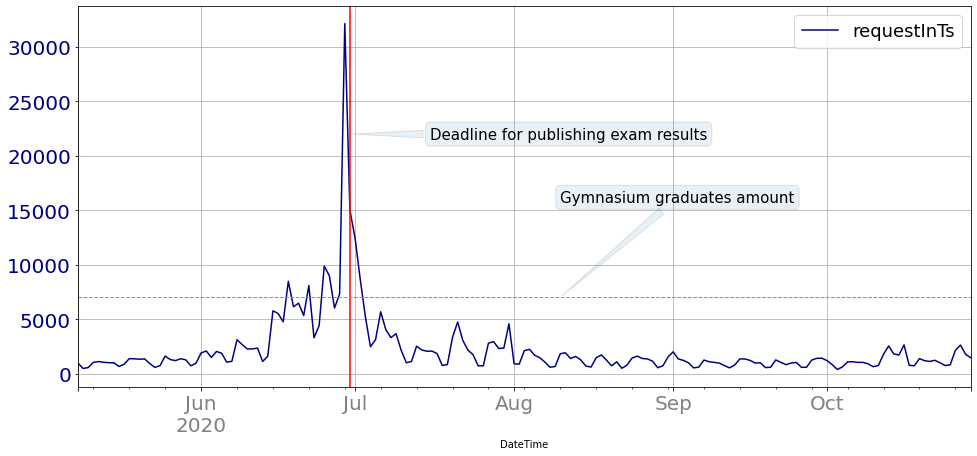

In [36]:
data_eksam1.plot(y='requestInTs', figsize=(16,7),grid=True,  linewidth=1.5, color='navy' )

plt.legend(prop={'size': 18})


plt.annotate("Deadline for publishing exam results", xy=('2020-06-30 00:00:00+03:00',22000),xycoords='data', 
            xytext=(80, 0), textcoords='offset points',
            size=15, ha='left', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

plt.annotate("Gymnasium graduates amount", xy=('2020-08-10 00:00:00+03:00',7000),xycoords='data', 
            xytext=(0, 100), textcoords='offset points',
            size=15, ha='left', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

plt.axvline(x='2020-06-30 00:00:00+03:00', color='r', linestyle='-', linewidth=1.5)
plt.axhline(y=7000, color='cornflowerblue', linestyle='--', linewidth=1.0)
plt.xticks(size = 20, color='gray')
plt.yticks(size = 20, color='navy')
plt.show()

In [37]:
data_eksam2 = data_eksam
data_eksam2 = data_eksam2.resample('h').count()
data_eksam2['Weekday'] = data_eksam2.index.to_series().dt.day_name()
data_eksam2['Hour'] = data_eksam2.index.to_series().dt.hour
data_eksam2['Month'] = data_eksam2.index.to_series().dt.month
data_eksam2

,producerDurationProducerView,requestInTs,securityServerType,succeeded,totalDuration,Weekday,Hour,Month
DateTime,,,,,,,,
2020-05-08 00:00:00+03:00,0,15,15,15,15,Friday,0,5
2020-05-08 01:00:00+03:00,0,15,15,15,15,Friday,1,5
2020-05-08 02:00:00+03:00,0,6,6,6,6,Friday,2,5
2020-05-08 03:00:00+03:00,0,3,3,3,3,Friday,3,5
2020-05-08 04:00:00+03:00,0,2,2,2,2,Friday,4,5
...,...,...,...,...,...,...,...,...
2020-10-29 19:00:00+02:00,0,79,79,79,79,Thursday,19,10
2020-10-29 20:00:00+02:00,0,76,76,76,76,Thursday,20,10
2020-10-29 21:00:00+02:00,0,65,65,65,65,Thursday,21,10


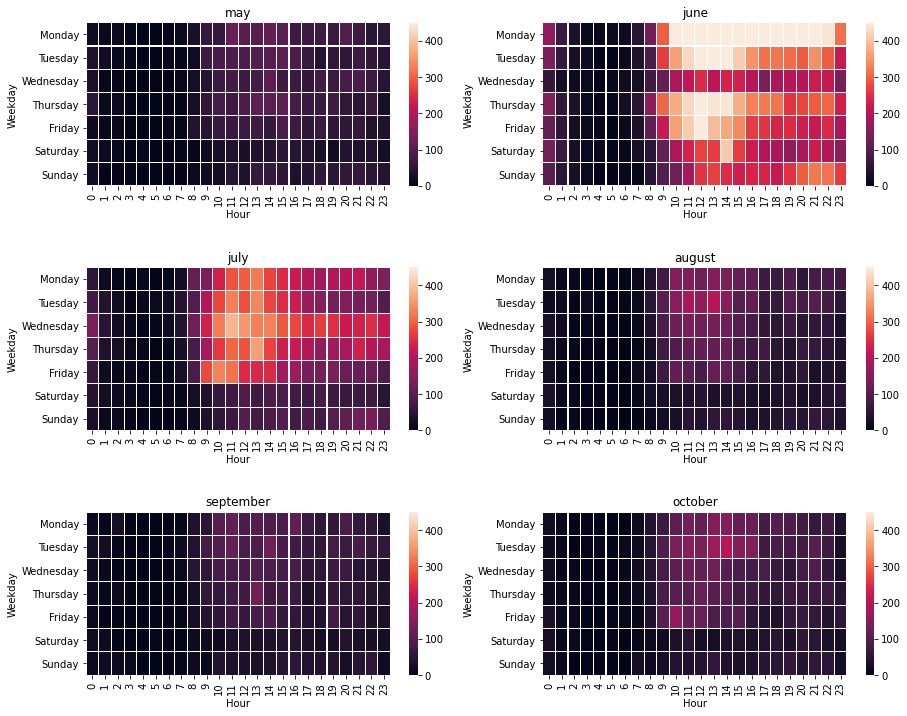

In [38]:
may = data_eksam2[data_eksam2['Month']==5]
june = data_eksam2[data_eksam2['Month']==6]
july = data_eksam2[data_eksam2['Month']==7]
august = data_eksam2[data_eksam2['Month']==8]
september = data_eksam2[data_eksam2['Month']==9]
october = data_eksam2[data_eksam2['Month']==10]
jarjend = [may, june, july, august, september, october]
nimed = ["may", "june", "july", "august", "september", "october"]
uus = [convertWeekDays(i) for i in jarjend]
cmay = uus[0]
cjune = uus[1]
cjuly = uus[2]
caugust = uus[3]
cseptember = uus[4]
coctober = uus[5]
abi = [cmay, cjune, cjuly, caugust, cseptember, coctober]
fig = plt.figure(figsize=[15,12])
for i in range(len(abi)):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(hspace = 0.5)
    fig = sns.heatmap(abi[i]
           , linewidths=0.1, vmin=0, vmax=450)
    fig.set_title(nimed[i])
#[print(i.tail()) for i in jarjend]

In [39]:
import seaborn as sns

data_eksam2 = data_eksam2.reset_index(drop=True)
print(data_eksam2.head())

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_eksam2['Weekday'] = data_eksam2['Weekday'].astype(cat_type)

data_eksam2 = data_eksam2.groupby(["Weekday", "Hour"]).mean()
data_eksam2 = data_eksam2.reset_index()
data_eksam2_pivot = data_eksam2.pivot(index="Weekday", columns="Hour", values="requestInTs")
data_eksam2_pivot

   producerDurationProducerView  requestInTs  securityServerType  succeeded  \
0                             0           15                  15         15   
1                             0           15                  15         15   
2                             0            6                   6          6   
3                             0            3                   3          3   
4                             0            2                   2          2   

   totalDuration Weekday  Hour  Month  
0             15  Friday     0      5  
1             15  Friday     1      5  
2              6  Friday     2      5  
3              3  Friday     3      5  
4              2  Friday     4      5  


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,54.12,22.72,15.44,5.120000,3.64,4.92,7.88,20.56,68.64,125.28,...,330.84,410.68,269.84,212.24,178.16,267.52,178.20,171.80,158.76,118.60
Tuesday,55.96,30.32,12.76,8.920000,5.04,4.76,9.80,22.96,59.16,141.68,...,233.04,192.16,174.08,134.44,129.44,137.04,129.24,148.68,125.80,90.16
Wednesday,53.52,20.36,10.68,6.680000,3.00,4.56,9.64,20.28,63.56,109.56,...,172.04,152.16,139.52,113.64,124.00,126.20,122.96,128.12,121.96,88.44
Thursday,59.80,22.92,17.48,6.040000,3.76,2.36,7.20,19.04,60.28,132.04,...,190.32,162.60,144.88,129.40,119.48,117.76,121.28,133.60,126.64,99.12
Friday,44.88,18.28,10.24,5.800000,3.04,3.68,6.44,17.76,55.68,134.40,...,166.36,145.60,116.64,99.92,94.88,106.12,98.24,93.32,87.52,73.64
Saturday,45.52,22.08,13.16,4.680000,5.68,4.20,5.08,10.28,23.44,39.04,...,105.72,85.96,74.44,66.92,68.36,58.64,69.68,72.64,68.68,53.80
Sunday,34.76,16.24,12.48,6.192308,1.92,1.60,3.12,9.12,20.32,33.80,...,88.00,83.64,77.72,80.92,80.80,91.80,96.24,111.60,108.36,78.36


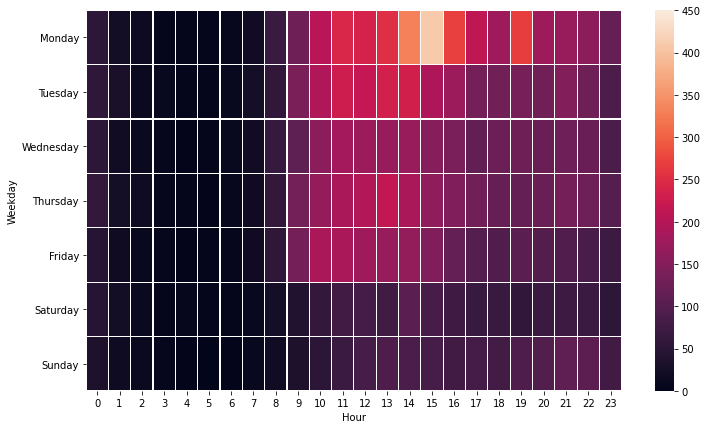

In [40]:
fig3 = plt.figure(figsize=[12,7])
sns.heatmap(data_eksam2_pivot
           , linewidths=0.1, vmin=0, vmax=450)

Text(0.5, 1.0, 'Mean of request by Weekday')

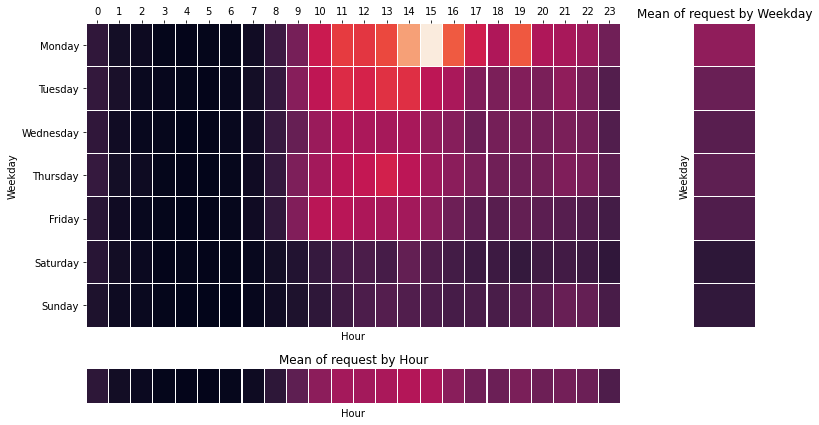

In [41]:
#Experiments with jointplots
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=16, rowspan=16)
ax2 = plt.subplot2grid((20,20), (18,0), colspan=16, rowspan=2)
ax3 = plt.subplot2grid((20,20), (0,18), colspan=2, rowspan=16)

#mask = np.zeros_like(pv)
#mask[np.tril_indices_from(mask)] = True

vmin = min(data_eksam2_pivot.values.min(), data_eksam2_pivot.values.min())
vmax = max(data_eksam2_pivot.values.max(), data_eksam2_pivot.values.max())

sns.heatmap(data_eksam2_pivot, ax=ax1, 
            #annot=True, 
            linewidths=0.1, vmin=vmin, vmax=vmax,
            #mask=mask, 
            linecolor='w', cbar = False)
ax1.xaxis.tick_top()
ax1.set_xticklabels(data_eksam2_pivot.columns
                    #,rotation=40
                   )
vmin = min(data_eksam2_pivot.values.min(), data_eksam2_pivot.values.min())
vmax = max(data_eksam2_pivot.values.max(), data_eksam2_pivot.values.max())



sns.heatmap((pd.DataFrame(data_eksam2_pivot.mean(axis=0))).transpose(), ax=ax2,  
            #annot=True, 
            linewidths=0.1, vmin=vmin, vmax=vmax,
            cbar=False, xticklabels=False, yticklabels=False)
ax2.set_title('Mean of request by Hour')

sns.heatmap(pd.DataFrame(data_eksam2_pivot.mean(axis=1)), ax=ax3,  
            #annot=True, 
            linewidths=0.1, vmin=vmin, vmax=vmax,
            cbar=False, xticklabels=False, yticklabels=False)
ax3.set_title('Mean of request by Weekday')

#fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[24,2,1]))
#fig.colorbar(axs[1].collections[0], cax=axs[2])




## Security class of availability

Is system businesstime 24/7 or 10/5

Assumtion, that 3 sec responce time is successful request

Estimation to availability class

- K0 90% OK NOK
- K1 99% OK NOK
- K2 99.9% OK NOK
- K3 99.99% OK NOK

In [ ]:
#TODO